In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf


In [49]:
#!pip install --upgrade DiadFit

In [2]:
df_combo=pd.read_excel('Raman_SEM_Merged.xlsx')
df_combo=df_combo.loc[df_combo['Fo']>0].reset_index(drop=True)
len(df_combo)

149

In [3]:
df_combo

,Unnamed: 0.1,Unnamed: 0,Mount,filename,Name_on_SEM,Notes regarding SEM matching,Unnamed: 5,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),...,Line_Si,Line_Ca,Line_Mn,Line_Fe,Line_Ni,Line_Al,Line_Ti,Line_Cr,SampleID,Fo
0,9,9,A,K24_10_FIA,K24_10_FIA,NaN,K24_10_FIA,0.048859,0.004082,0.001386,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,K24_10_FIA,0.854767
1,10,10,A,K24_10_FIB,K24_10_FIB,NaN,K24_10_FIB,0.056119,0.004361,0.002092,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,K24_10_FIB,0.867048
2,11,11,A,K24_11_FIA,"K24_11_FIA,B",NaN,K24_11_FIA,0.125982,0.004292,0.001919,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,"K24_11_FIA,B",0.853562
3,12,12,A,K24_11_FIB,"K24_11_FIA,B",NaN,K24_11_FIB,0.085747,0.012513,0.011921,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,"K24_11_FIA,B",0.853562
4,13,13,A,K24_11_FIC,K24_11_FIC,NaN,K24_11_FIC,0.129648,0.004284,0.001886,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,K24_11_FIC,0.854732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,163,163,NaN,K24_40_FIA,K24_40_FIA,NaN,K24_40_FIA,0.113685,0.004704,0.002748,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,K24_40_FIA,0.888021
145,164,164,NaN,K24_40_FIB,K24_40_core,NaN,K24_40_FIB,0.127505,0.004580,0.002494,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,K24_40_core,0.890827
146,165,165,NaN,KL0919-013-A-rep2-6mW,KL0919_013_FIA,NaN,919_013_A_rep2_6mW,0.429251,0.005502,0.004975,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,KL0919_013_FIA,0.887041
147,166,166,NaN,KL0919-013-B-rep2-6mW,KL0919_013_FIB,NaN,919_013_B_rep2_6mW,0.387546,0.003067,0.001973,...,K series,K series,K series,K series,Kα,NaN,NaN,NaN,KL0919_013_FIB,0.887478


## Lets load over the XH2O correction
- This is from DeVitre and Wieser (2024) GPL

In [4]:
import pickle
# This is the lowest XH2O
with open('C:\\Users\\penny\\Box\\Berkeley_new\\Finished_VIBE_Projects\\DeVitre_MI_FI_Comparison\\Pf.pkl', 'rb') as f:
    Pf_low = pickle.load(f)

# This is the median XH2O
with open('C:\\Users\\penny\\Box\\Berkeley_new\\Finished_VIBE_Projects\\DeVitre_MI_FI_Comparison\\Pf3.pkl', 'rb') as f:
    Pf_max = pickle.load(f)

# This is the median XH2O - pressure  relationship. 
with open('C:\\Users\\penny\\Box\\Berkeley_new\\Finished_VIBE_Projects\\DeVitre_MI_FI_Comparison\\Pf4.pkl', 'rb') as f:
    Pf_med = pickle.load(f)

# And its defined as XH2O_av=1-Pf_med(P_SW96['P_MPa'])

In [5]:
1-Pf_max(100)

0.055096024995448634

In [6]:
1-Pf_med(100)

0.03426100203814175

In [7]:
1-Pf_low(100)

0.013905453706570592

## Lets load over the Temp vs Fo correction
- Also from DeVitre and Wieser (2024)

In [8]:
with open('TempFoModel.pkl', 'rb') as f:
    Pf_TempFo = pickle.load(f)

In [9]:
SO2_frac=pf.calculate_mole_fraction_2comp(peak_area_a=df_combo['Peak_Area_SO2'], peak_area_b=df_combo['Diad1_Voigt_Area']+df_combo['Diad2_Voigt_Area'],
                                  cross_section_a=5.3, cross_section_b=1.4+0.89, instrument_eff_a=1, instrument_eff_b=1)['% A']

## temp 

In [10]:

df_combo['Temp_from_Fo_all']=Pf_TempFo(df_combo['Fo'])
MeanT=np.nanmean(df_combo['Temp_from_Fo_all'])
df_combo['Temp_from_Fo_all'] = df_combo['Temp_from_Fo_all'].fillna(MeanT)

# Create 'Temp_error' column based on whether 'Temp_from_Fo' is a number
df_combo['Temp_error'] = np.where(df_combo['Temp_from_Fo_all'] == MeanT, 100, 50)


In [11]:
np.nanstd(df_combo['Temp_from_Fo_all'])

36.79809381905391

## Pure CO2 pressure

In [12]:
P_SW96=pf.calculate_P_for_rho_T(CO2_dens_gcm3=df_combo['Density g/cm3'], 
                                T_K=df_combo['Temp_from_Fo_all']+273.15, EOS='SW96')
P_SW96.head()

,P_kbar,P_MPa,T_K,CO2_dens_gcm3
0,0.144386,14.438553,1513.193250,0.048859
1,0.169413,16.941292,1537.338539,0.056119
2,0.393081,39.308146,1510.998480,0.125982
3,0.259715,25.971509,1510.998480,0.085747
4,0.406250,40.625050,1513.129226,0.129648


In [13]:
## Lets calculate XH2O from Kil
XH2O_av=1-Pf_med(P_SW96['P_MPa'])
XH2O_av[XH2O_av<0]=0.02

XH2O_min=1-Pf_low(P_SW96['P_MPa'])
XH2O_min[XH2O_min<0]=0.02

XH2O_max=1-Pf_max(P_SW96['P_MPa'])
XH2O_max[XH2O_max<0]=0.02

df_combo['XH2O']=XH2O_av
df_combo['XH2O']=df_combo['XH2O'].fillna(0)

## CAlculate DZ EOS using the XH2O calc above 

In [14]:
P_DZ06=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_av, CO2_dens_gcm3=df_combo['Density g/cm3'],
                 T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
P_DZ06_MinXH2O=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_min, CO2_dens_gcm3=df_combo['Density g/cm3'],
                 T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
P_DZ06_MaxXH2O=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_max, CO2_dens_gcm3=df_combo['Density g/cm3'],
                 T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)

In [15]:
# Now lets do one more iteration - multiple ones really dont change much. 
XH2O_av2=1-Pf_med(100*P_DZ06['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_av2[XH2O_av2<0]=0.02

XH2O_min2=1-Pf_low(100*P_DZ06_MinXH2O['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_min2[XH2O_min2<0]=0.02

XH2O_max2=1-Pf_max(100*P_DZ06_MaxXH2O['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_max2[XH2O_max2<0]=0.02

P_DZ062=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_av2, CO2_dens_gcm3=df_combo['Density g/cm3'],
                 T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
P_DZ06_MinXH2O2=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_min2, CO2_dens_gcm3=df_combo['Density g/cm3'],
                 T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
P_DZ06_MaxXH2O2=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_max2, CO2_dens_gcm3=df_combo['Density g/cm3'],
                 T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)


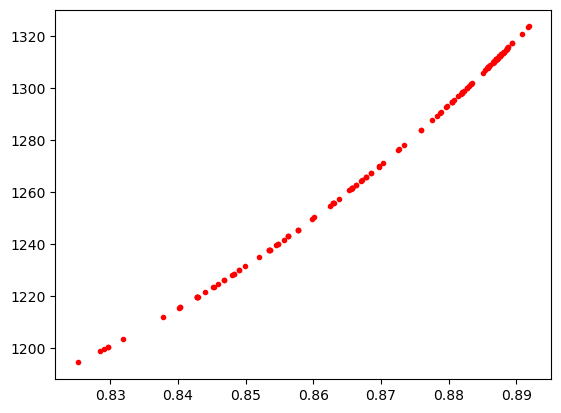

In [69]:
plt.plot(df_combo['Fo'], df_combo['Temp_from_Fo_all'], '.r')

## Lets propagate uncertainty

In [17]:
## Duan and Zhang Error propagate. 
MC_Av_rho_T_df_B, MC_All_rho_T_df_B, fig=pf.propagate_FI_uncertainty(
T_K=df_combo['Temp_from_Fo_all']+273.15,
error_T_K=df_combo['Temp_error'], error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=df_combo['Density g/cm3'],error_CO2_dens=df_combo['σ Density g/cm3'], 
error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
XH2O=XH2O_av, error_XH2O=pd.Series(0.5*np.abs(XH2O_max-XH2O_min)), error_type_XH2O='Abs', error_dist_XH2O='normal',
sample_ID=df_combo['filename'],
model='denlinger_lerner',
N_dup=500, fig_i=0, plot_figure=False)

You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 2006. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS


Processing: 100%|██████████| 149/149 [04:37<00:00,  1.86s/it]


In [20]:
K24=df_combo['filename'].str.contains('K24')
U919=df_combo['filename'].str.contains('919')

In [ ]:
df_combo['Fo']=df_combo['Fo'].fillna(0.9)

In [23]:
import Thermobar as pt

## Lets get the equilibrium Olivine Fo contents here 

In [25]:
Ulu_MG_input=pt.import_excel(r'G:\My Drive\Kilauea2024_RapidResponseSWRZ\1974_olivine_glass_data\UluData.xlsx',
                         sheet_name='Matrix Glass')
Ulu_all=Ulu_MG_input['my_input'] ## All columns
Ulu_Liqs_all=Ulu_MG_input['Liqs'] ## Just Liquid columns
Ulu_Liqs_19=Ulu_Liqs_all.loc[Ulu_all['Eruption']==919]
Ulu_Liqs_19.head()
Mean_19=np.mean(Ulu_Liqs_19)

In [27]:
glass

,Unnamed: 0,Sample Name,Total_wt%,Total_Oxide%,Al2O3,CaO,FeOt,K2O,MgO,MnO,...,Line_Si,Line_P,Line_S,Line_K,Line_Ca,Line_Ti,Line_Mn,Line_Fe,SampleID,Mg#
3,3,K24_Mount1_glass1_1,99.0818,99.0818,13.9494,10.9124,10.8721,0.5062,6.3378,0.1965,...,K series,K series,K series,K series,K series,K series,K series,K series,Mount1_glass1_1,0.558930
4,4,K24_Mount1_glass1_2,98.9432,98.9432,13.9718,10.8649,10.8212,0.5404,6.3854,0.2244,...,K series,K series,K series,K series,K series,K series,K series,K series,Mount1_glass1_2,0.561929
5,5,K24_Mount1_glass2_1,99.9994,99.9994,14.1871,10.9437,10.8275,0.5239,6.4555,0.1853,...,K series,K series,K series,K series,K series,K series,K series,K series,Mount1_glass2_1,0.564472
6,6,K24_Mount1_glass3_1,99.6900,99.6900,14.1024,10.9767,10.8489,0.5137,6.4336,0.1964,...,K series,K series,K series,K series,K series,K series,K series,K series,Mount1_glass3_1,0.563150
7,7,L24_Mount1_glass4_1,100.8245,100.8245,14.2734,11.0545,10.9645,0.5205,6.5610,0.1720,...,K series,K series,K series,K series,K series,K series,K series,K series,Mount1_glass4_1,0.565366


In [38]:
## Glasses 


K24_MG_input=pt.import_excel(r'GlassData2024.xlsx',
                         sheet_name='glass', suffix='_Liq')
K24_all=K24_MG_input['my_input'] ## All columns
K24_Liqs_all=K24_MG_input['Liqs'] ## Just Liquid columns
Liq_Mean_24=np.mean(K24_Liqs_all)

In [39]:
K24_Liqs_all

,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,49.5836,1.9870,13.9269,11.9916,0.2289,6.5309,10.7876,2.6928,0.2097,0.0,0.2532,0.0,0.0,0.0,0.0,0.0,0
1,49.4155,2.0029,13.8746,11.8569,0.2258,6.6142,10.7479,2.7164,0.1747,0.0,0.2057,0.0,0.0,0.0,0.0,0.0,1
2,49.6459,2.0178,13.8297,11.8792,0.2454,6.5330,10.8564,2.7839,0.2095,0.0,0.1946,0.0,0.0,0.0,0.0,0.0,2
3,50.6236,2.9163,13.9494,10.8721,0.1965,6.3378,10.9124,2.4751,0.5062,0.0,0.2584,0.0,0.0,0.0,0.0,0.0,3
4,50.4679,2.8971,13.9718,10.8212,0.2244,6.3854,10.8649,2.5100,0.5404,0.0,0.2302,0.0,0.0,0.0,0.0,0.0,4
5,51.1935,2.9535,14.1871,10.8275,0.1853,6.4555,10.9437,2.4221,0.5239,0.0,0.2929,0.0,0.0,0.0,0.0,0.0,5
6,50.8685,2.8981,14.1024,10.8489,0.1964,6.4336,10.9767,2.5362,0.5137,0.0,0.2931,0.0,0.0,0.0,0.0,0.0,6
7,51.4317,2.9307,14.2734,10.9645,0.1720,6.5610,11.0545,2.5762,0.5205,0.0,0.2915,0.0,0.0,0.0,0.0,0.0,7


In [43]:
help(pt.calculate_eq_ol_content)

Help on function calculate_eq_ol_content in module Thermobar.mineral_equilibrium:

calculate_eq_ol_content(liq_comps, Kd_model, ol_comps=None, T=None, P=None, Fe3Fet_Liq=None, ol_fo=None, H2O_Liq=None, logfo2=None)
    calculates equilibrium forsterite contents based on inputtted liquid compositions.
    
    
    Parameters
     -------
    
     liq_comps: pandas.DataFrame
         Liquid compositions with column headings SiO2_Ol, MgO_Ol etc.
    
    
     Kd_model: str, int or float
         Specify which Kd model you wish to use.
    
         int or float: e.g. Kd=0.35, will return that number.
    
         "Shea2022": Uses 0.335+-0.1 (not sensitive to P, T, or ol Fo content. For hawaiian tholeiites)
    
         "Roeder1970": uses Kd=0.3+0.03 (Not sensitive to P, T, or Ol Fo content)
    
         "Matzen2011": uses Kd=0.34+0.012 (Not sensitive to P, T, or Ol Fo content)
    
         "Toplis2005": calculates Kd based on melt SiO2, Na2O, K2O, P, T, H2O, Ol Fo content.
        

In [54]:
Eq_Ol_19=pt.calculate_eq_ol_content(liq_comps=Ulu_Liqs_19, Kd_model="Shea2022",Fe3Fet_Liq=0.18)
Eq_Ol_24=pt.calculate_eq_ol_content(liq_comps=K24_Liqs_all, Kd_model="Shea2022",Fe3Fet_Liq=0.18)

In [55]:
np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.335)'])

0.834256220498497

In [56]:
MC_Av_rho_T_df_B

,Filename,CO2_dens_gcm3,SingleFI_D_km,SingleFI_P_kbar,Mean_MC_P_kbar,Med_MC_P_kbar,std_dev_MC_P_kbar,std_dev_MC_P_kbar_from_percentile,Mean_MC_D_km,Med_MC_D_km,...,error_CO2_dens_gcm3,error_crust_dens_kgm3,T_K,CO2_dens_gcm3_input,model,crust_dens_kgm3,EOS,error_XH2O,error_type_XH2O,error_dist_XH2O
0,K24_10_FIA,0.048859,0.765054,0.174482,0.178643,0.175863,0.027504,0.027310,0.782594,0.770993,...,0.004082,0.0,1513.193250,0.048859,denlinger_lerner,None,SW96,0.098100,Abs,normal
1,K24_10_FIB,0.056119,0.880502,0.201400,0.202793,0.200000,0.027379,0.026578,0.886116,0.874515,...,0.004361,0.0,1537.338539,0.056119,denlinger_lerner,None,SW96,0.090331,Abs,normal
2,K24_11_FIA,0.125982,1.824668,0.427481,0.429447,0.427338,0.029538,0.028659,1.832328,1.824083,...,0.004292,0.0,1510.998480,0.125982,denlinger_lerner,None,SW96,0.045284,Abs,normal
3,K24_11_FIB,0.085747,1.275439,0.294670,0.295646,0.291403,0.053509,0.050414,1.278274,1.261737,...,0.012513,0.0,1510.998480,0.085747,denlinger_lerner,None,SW96,0.067263,Abs,normal
4,K24_11_FIC,0.129648,1.877827,0.440530,0.443755,0.441439,0.031860,0.031045,1.890528,1.881526,...,0.004284,0.0,1513.129226,0.129648,denlinger_lerner,None,SW96,0.043765,Abs,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,K24_40_FIA,0.113685,1.730300,0.404402,0.405324,0.404840,0.030002,0.028475,1.733703,1.732094,...,0.004704,0.0,1586.619996,0.113685,denlinger_lerner,None,SW96,0.048212,Abs,normal
145,K24_40_FIB,0.127505,1.937626,0.455249,0.456080,0.455592,0.030739,0.030511,1.940612,1.939016,...,0.004580,0.0,1594.037690,0.127505,denlinger_lerner,None,SW96,0.042144,Abs,normal
146,KL0919-013-A-rep2-6mW,0.429251,7.223926,1.921074,1.922057,1.928189,0.075022,0.075853,7.226566,7.247422,...,0.005502,0.0,1584.076867,0.429251,denlinger_lerner,None,SW96,0.000000,Abs,normal
147,KL0919-013-B-rep2-6mW,0.387546,6.335518,1.654795,1.659211,1.660922,0.063170,0.062729,6.349778,6.356186,...,0.003067,0.0,1585.208665,0.387546,denlinger_lerner,None,SW96,0.000000,Abs,normal


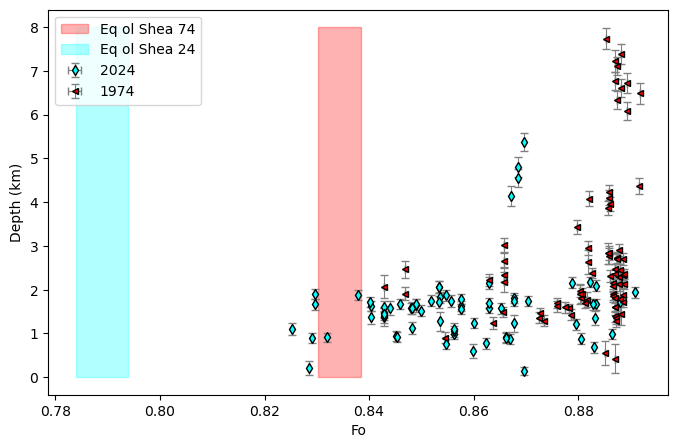

In [58]:
fig, (ax1) = plt.subplots(1, 1, figsize = (8,5))

# Calculate x coordinates
x1 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.345)'])

# Plot rectangle
plt.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='red', alpha=0.3, label='Eq ol Shea 74')

# Calculate x coordinates
x1 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.345)'])

# Plot rectangle
plt.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='cyan', alpha=0.3, label='Eq ol Shea 24')


ax1.errorbar(df_combo['Fo'].loc[K24], MC_Av_rho_T_df_B['SingleFI_D_km'].loc[K24], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3, label='2024')
ax1.errorbar(df_combo['Fo'].loc[U919], MC_Av_rho_T_df_B['SingleFI_D_km'].loc[U919], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3, label='1974')


ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
plt.legend()#
fig.savefig('FoDepth.png', dpi=300)

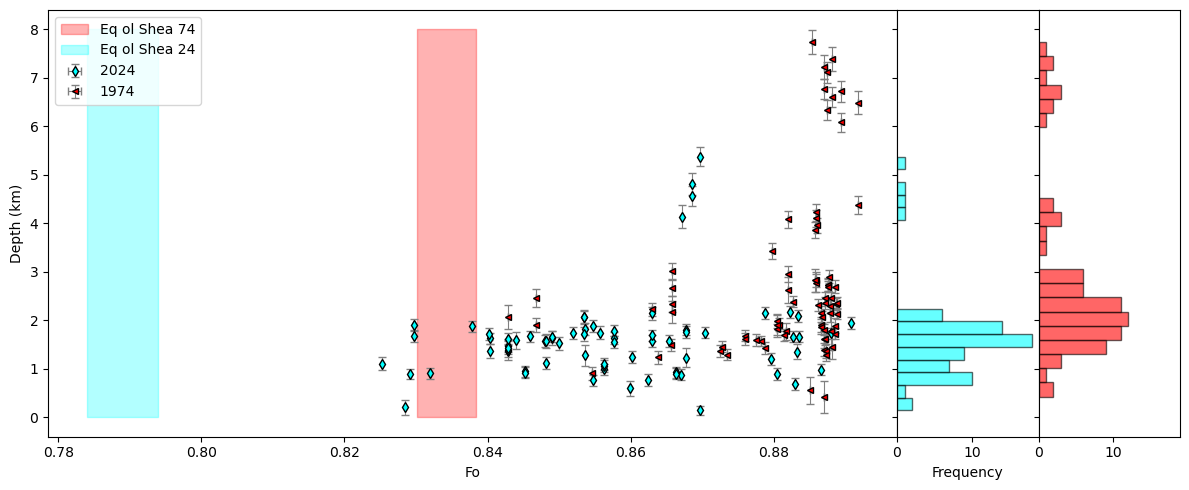

In [67]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 0.5, 0.5], wspace=0)

ax1 = plt.subplot(gs[0])

# Calculate x coordinates and plot rectangles for Eq_Ol_19
x1 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_19['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='red', alpha=0.3, label='Eq ol Shea 74')

# Calculate x coordinates and plot rectangles for Eq_Ol_24
x1 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.325)'])
x2 = np.mean(Eq_Ol_24['Eq Fo (Shea, Kd=0.345)'])
ax1.fill_betweenx(y=[0, 8], x1=x1, x2=x2, color='cyan', alpha=0.3, label='Eq ol Shea 24')

# Plot error bars
ax1.errorbar(df_combo['Fo'].loc[K24], MC_Av_rho_T_df_B['SingleFI_D_km'].loc[K24], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='grey', elinewidth=0.8, mfc='cyan', ms=5, mec='k', capsize=3, label='2024')
ax1.errorbar(df_combo['Fo'].loc[U919], MC_Av_rho_T_df_B['SingleFI_D_km'].loc[U919], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='<', ecolor='grey', elinewidth=0.8, mfc='red', ms=5, mec='k', capsize=3, label='1974')

ax1.set_xlabel('Fo')
ax1.set_ylabel('Depth (km)')
ax1.legend()

# Histogram plot
ax2 = plt.subplot(gs[1], sharey=ax1)
ax3 = plt.subplot(gs[2], sharey=ax1, sharex=ax2)
ax2.hist(MC_Av_rho_T_df_B['SingleFI_D_km'].loc[K24], bins=20, stacked=True, orientation='horizontal', color=['cyan'], ec='k', alpha=0.6)
ax3.hist(MC_Av_rho_T_df_B['SingleFI_D_km'].loc[U919], bins=25, stacked=True, orientation='horizontal', color=['red'], ec='k', alpha=0.6)

ax2.set_xlabel('Frequency')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.tight_layout()
fig.savefig('FoDepth.png', dpi=300)
plt.show()

In [77]:
MC_Av_rho_T_df_B['Filename']=MC_Av_rho_T_df_B['Filename'].str.replace('-', '_')
MC_Av_rho_T_df_B['crystal'] = MC_Av_rho_T_df_B['Filename'].str.split('_').str[:2].str.join('_')

In [79]:
MC_Av_rho_T_df_B['Filename']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
144    NaN
145    NaN
146    NaN
147    NaN
148    NaN
Name: Filename, Length: 149, dtype: object

In [75]:
# Replace non-numeric columns with NaN
numeric_columns = MC_Av_rho_T_df_B.select_dtypes(include=[np.number]).columns
MC_Av_rho_T_df_B.loc[:, ~MC_Av_rho_T_df_B.columns.isin(numeric_columns)] = np.nan

# Group by 'crystal' and calculate the mean for each group
averaged_df = MC_Av_rho_T_df_B.groupby('crystal').mean().reset_index()

print(averaged_df)

Empty DataFrame
Columns: [crystal, Filename, CO2_dens_gcm3, SingleFI_D_km, SingleFI_P_kbar, Mean_MC_P_kbar, Med_MC_P_kbar, std_dev_MC_P_kbar, std_dev_MC_P_kbar_from_percentile, Mean_MC_D_km, Med_MC_D_km, std_dev_MC_D_km, std_dev_MC_D_km_from_percentile, error_T_K, error_CO2_dens_gcm3, error_crust_dens_kgm3, T_K, CO2_dens_gcm3_input, model, crust_dens_kgm3, EOS, error_XH2O, error_type_XH2O, error_dist_XH2O]
Index: []

[0 rows x 24 columns]


In [72]:
MC_Av_rho_T_df_B['Filename']

0                 K24_10_FIA
1                 K24_10_FIB
2                 K24_11_FIA
3                 K24_11_FIB
4                 K24_11_FIC
               ...          
144               K24_40_FIA
145               K24_40_FIB
146    KL0919_013_A_rep2_6mW
147    KL0919_013_B_rep2_6mW
148    KL0919_013_C_rep2_6mW
Name: Filename, Length: 149, dtype: object

In [ ]:
# Lets do this manually

i=3
N_dup=500
# Temp 
T_K=df_combo['Temp_from_Fo_all'].iloc[i]+273.15,
error_T_K=df_combo['Temp_error'].iloc[i]
MC_T_K=T_K + np.random.normal(0, error_T_K, N_dup)

# CO2 density
CO2_dens_gcm3=df_combo['Density g/cm3'].iloc[i]
error_CO2_dens=df_combo['σ Density g/cm3'].iloc[i]
MC_CO2=CO2_dens_gcm3 + np.random.normal(0, error_CO2_dens, N_dup)

# XH2O
XH2O=XH2O_av2[i]
error_XH2O=0.5*np.abs(XH2O_max2[i]-XH2O_min2[i])
MC_XH2O=XH2O + np.random.normal(0, error_XH2O, N_dup)
# MC_XH2O[MC_XH2O<0]=0
# MC_CO2[MC_CO2<0]=0

In [ ]:
test_MC=pf.calculate_entrapment_P_XH2O(XH2O=MC_XH2O, CO2_dens_gcm3=MC_CO2, T_K=MC_T_K, T_K_ambient=37+273.15, fast_calcs=True)

0.036471146028317906
0.036463577077125164


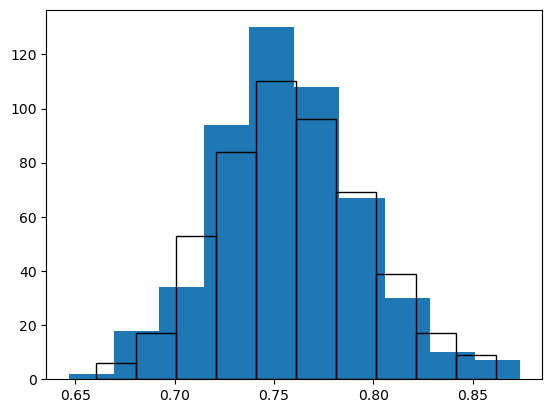

In [ ]:
plt.hist(test_MC)
plt.hist(MC_All_rho_T_df_B['Pressure (kbar)'].loc[MC_All_rho_T_df_B['Filename']==df_combo['filename'].iloc[i]], fc='None', ec='k')
print(np.std(test_MC))
print(np.std(MC_All_rho_T_df_B['Pressure (kbar)'].loc[MC_All_rho_T_df_B['Filename']==df_combo['filename'].iloc[i]]))

error_CO2_dens

NameError: name 'P_DZ062' is not defined

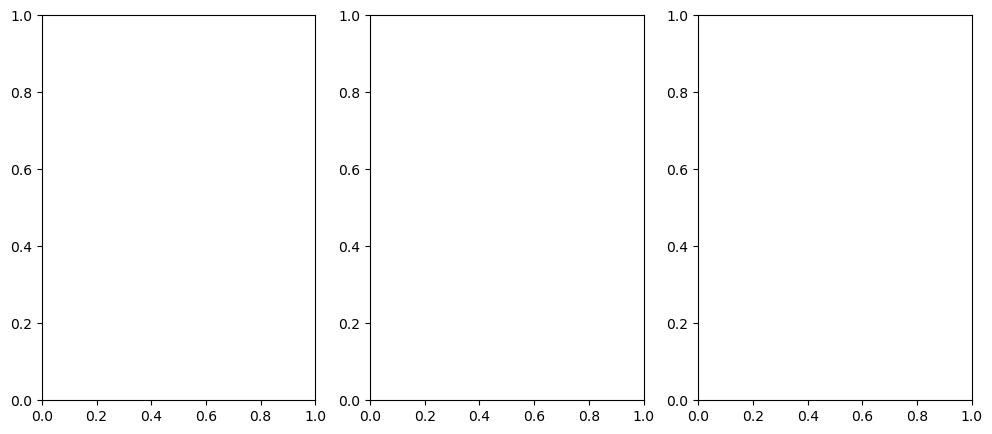

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,5))


## LETS SHOW A CDF FUNCTION OF THE PRESSURE DIFFERENCE - ITS SMALL ############

x1=100*P_DZ062['P_kbar_pureCO2_SW96']
x1_sorted=np.sort(x1)
ax1.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='orange', linewidth=1, label='SW96 CO$_2$ EOS')

x1=100*P_DZ062['P_kbar_mixCO2_DZ06_Hloss']
x1_sorted=np.sort(x1)
ax1.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='green', linewidth=1, label='DZ06 CO$_2$-H$_2$O EOS \n (Av XH2O+-error)')
plt.legend()

x2=100*P_DZ06_MinXH2O2['P_kbar_mixCO2_DZ06_Hloss']
x2_sorted=np.sort(x2)
# ax1.step(np.concatenate([x2_sorted, x2_sorted[[-1]]]),
#          np.arange(x2_sorted.size+1)/x2_sorted.size, color='red', linewidth=1, linestyle='-', label='DZ06')
y = np.arange(x1_sorted.size + 1) / x1_sorted.size  # Cumulative probability for each step


x3=100*P_DZ06_MaxXH2O2['P_kbar_mixCO2_DZ06_Hloss']
x3_sorted=np.sort(x3)
# ax1.step(np.concatenate([x3_sorted, x3_sorted[[-1]]]),
#          np.arange(x3_sorted.size+1)/x3_sorted.size, color='blue', linewidth=1, linestyle='-', label='DZ06')
ax1.legend()
ax1.set_xlabel('P (MPa)')
ax1.set_ylabel('Cumulative Density')


error = np.full_like(x1_sorted, 5)  # Replace 5 with your actual error values

# Adding horizontal error bars - notice 'fmt='none'' for no central marker, adjust 'ecolor' and 'elinewidth' as needed
ax1.errorbar(x1_sorted, y[:-1], xerr=[x3_sorted-x1_sorted, x1_sorted-x2_sorted], fmt='o', ms=3, ecolor='k', capsize=2, elinewidth=1, alpha=0.5)


ax2.plot()

ax2.errorbar(df_combo['Density g/cm3'], 100*MC_Av_rho_T_df_B['SingleFI_P_kbar'], 
             xerr=df_combo['σ Density g/cm3'], yerr=100*MC_Av_rho_T_df_B['std_dev_MC_P_kbar_from_percentile'],
               fmt='d', mec='k',ecolor='grey', mfc='green', ms=5, capsize=2, elinewidth=1, alpha=1)

ax2.set_xlabel('CO$_2$ Density (g/cm$^{3}$)')
ax2.set_ylabel('Pressure (MPa)')


# Lets show different density-depth models

Depth_RL=pf.convert_pressure_to_depth(P_kbar=P_DZ062['P_kbar_mixCO2_DZ06_Hloss'], model='ryan_lerner')
Depth_2400=pf.convert_pressure_to_depth(P_kbar=P_DZ062['P_kbar_mixCO2_DZ06_Hloss'], crust_dens_kgm3=2400)

ax3.errorbar(df_combo['Density g/cm3'], MC_Av_rho_T_df_B['SingleFI_D_km'], 
             xerr=df_combo['σ Density g/cm3'], yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'],
               fmt='d', mec='k',  ecolor='grey', capsize=2, elinewidth=1, alpha=1, label='Denlinger-Lerner')

ax3.plot(df_combo['Density g/cm3'], Depth_RL, 'xk', label='Ryan-Lerner')
ax3.plot(df_combo['Density g/cm3'], Depth_2400, 'xm', label='2400 kg/m$^{3}$')
ax3.set_xlabel('CO$_2$ Density (g/cm$^{3}$)')
ax3.set_ylabel('Depth (km)')
ax3.legend()
fig.tight_layout()

ax1.annotate("a)", xy=(0.93, 0.02), xycoords="axes fraction", fontsize=12)
ax2.annotate("b)", xy=(0.93, 0.02), xycoords="axes fraction", fontsize=12)
ax3.annotate("c)", xy=(0.93, 0.02), xycoords="axes fraction", fontsize=12)
fig.savefig('Errors_2022FI.png', dpi=200)

In [ ]:
np.nanmean(MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'])

0.15711339251667447

In [ ]:

np.nanmean(MC_Av_rho_T_df_B['std_dev_MC_P_kbar_from_percentile'])*100

4.078604228976206

In [ ]:
np.nanmean(MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'])

0.15711339251667447

In [ ]:
df_combo_clip=df_combo.copy()
# Lets strip out the columns we dont want.
df_combo_clip = df_combo_clip[[col for col in df_combo_clip.columns if not any(x in col for x in
                             ['Unnamed', 'cpxprim', 'Fo content (mol%)',  '_y', 'Preferred D_σ_Ne',
                              'Preferred D_σ_pkfit', 'HighD_RT', 'LowD_RT', '_SC'
                              ])]]





In [ ]:
df_combo_clip.to_clipboard(excel=True, index=False)

In [ ]:
df_combo_clip.columns[100:200]

Index(['X_POS', 'Y_POS', 'Z_POS', 'BEAMCURR', 'BEAMCURR2', 'SiO2_olprim',
       'TiO2_olprim', 'Al2O3_olprim', 'Cr2O3_olprim', 'FeO_olprim',
       'NiO_olprim', 'MnO_olprim', 'MgO_olprim', 'CaO_olprim', 'Na2O_olprim',
       'O_olprim', 'TOTAL_olprim', 'SiO2_CDL99_olprim', 'TiO2_CDL99_olprim',
       'Al2O3_CDL99_olprim', 'Cr2O3_CDL99_olprim', 'FeO_CDL99_olprim',
       'NiO_CDL99_olprim', 'MnO_CDL99_olprim', 'MgO_CDL99_olprim',
       'CaO_CDL99_olprim', 'Na2O_CDL99_olprim', 'Si__PCTERR__olprim',
       'Ti__PCTERR__olprim_olprim', 'Al__PCTERR__olprim', 'Cr__PCTERR__olprim',
       'Fe__PCTERR__olprim', 'Ni__PCTERR__olprim', 'Mn__PCTERR__olprim',
       'Mg__PCTERR__olprim', 'Ca__PCTERR__olprim', 'Na__PCTERR__olprim',
       'Si_STD_NUM_olprim', 'Ti_STD_NUM_olprim', 'Al_STD_NUM_olprim',
       'Cr_STD_NUM_olprim', 'Fe_STD_NUM_olprim', 'Ni_STD_NUM_olprim',
       'Mn_STD_NUM_olprim', 'Mg_STD_NUM_olprim', 'Ca_STD_NUM_olprim',
       'Na_STD_NUM_olprim', 'Si_STD_NAM_olprim', 'Ti_STD_NA

In [ ]:
MC_Av_rho_T_df_B.to_clipboard(excel=True, index=False)

In [ ]:
np.nanmedian(MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'])

0.15593774730247834

(array([2., 6., 3., 4., 6., 6., 2., 0., 0., 2.]),
 array([2.50606432, 2.90471531, 3.3033663 , 3.70201728, 4.10066827,
        4.49931926, 4.89797024, 5.29662123, 5.69527222, 6.09392321,
        6.49257419]),
 <BarContainer object of 10 artists>)

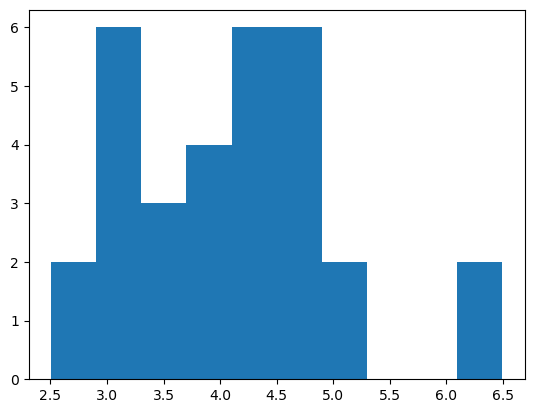

In [ ]:
plt.hist(100*MC_Av_rho_T_df_B['std_dev_MC_P_kbar_from_percentile'])

In [ ]:
MC_Av_rho_T_df_B.columns[0:100]

Index(['Filename', 'CO2_dens_gcm3', 'SingleFI_D_km', 'SingleFI_P_kbar',
       'Mean_MC_P_kbar', 'Med_MC_P_kbar', 'std_dev_MC_P_kbar',
       'std_dev_MC_P_kbar_from_percentile', 'Mean_MC_D_km', 'Med_MC_D_km',
       'std_dev_MC_D_km', 'std_dev_MC_D_km_from_percentile', 'error_T_K',
       'error_CO2_dens_gcm3', 'error_crust_dens_kgm3', 'T_K',
       'CO2_dens_gcm3_input', 'model', 'crust_dens_kgm3', 'EOS', 'error_XH2O',
       'error_type_XH2O', 'error_dist_XH2O'],
      dtype='object')

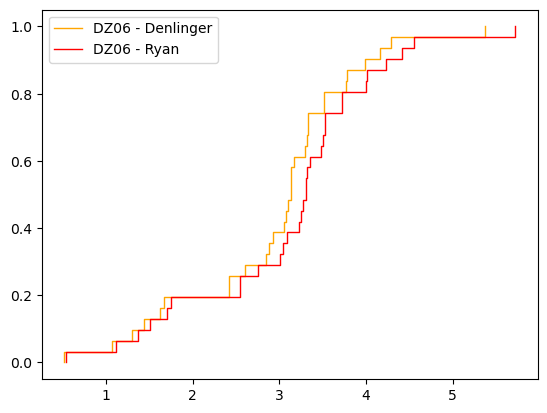

In [ ]:
Depth_DL=pf.convert_pressure_to_depth(P_kbar=P_DZ06['P_kbar_mixCO2_DZ06_Hloss'], model='denlinger_lerner')
x1=Depth_DL
x1_sorted=np.sort(x1)
plt.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='orange', linewidth=1, label='DZ06 - Denlinger')

Depth_RL=pf.convert_pressure_to_depth(P_kbar=P_DZ06['P_kbar_mixCO2_DZ06_Hloss'], model='ryan_lerner')
x1=Depth_RL
x1_sorted=np.sort(x1)
plt.step(np.concatenate([x1_sorted, x1_sorted[[-1]]]),
         np.arange(x1_sorted.size+1)/x1_sorted.size, color='red', linewidth=1, label='DZ06 - Ryan')
plt.legend()

(array([1., 0., 1., 2., 2., 0., 0., 2., 1., 3., 7., 4., 2., 2., 1., 2., 0.,
        0., 0., 1.]),
 array([0.52227144, 0.76457576, 1.00688008, 1.2491844 , 1.49148872,
        1.73379304, 1.97609736, 2.21840168, 2.460706  , 2.70301032,
        2.94531464, 3.18761896, 3.42992328, 3.6722276 , 3.91453192,
        4.15683624, 4.39914056, 4.64144488, 4.8837492 , 5.12605352,
        5.36835784]),
 <BarContainer object of 20 artists>)

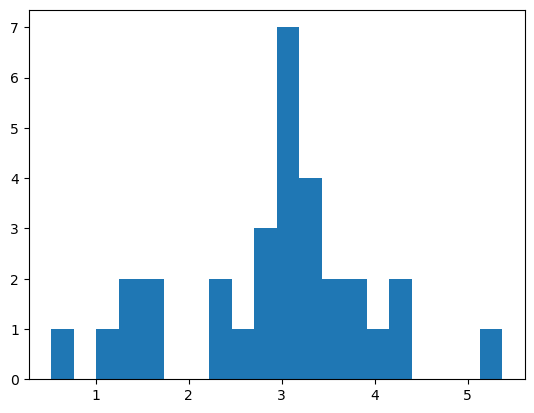

In [ ]:
plt.hist(Depth_DL, bins=20)

In [ ]:
sum(Depth_DL<2)

6

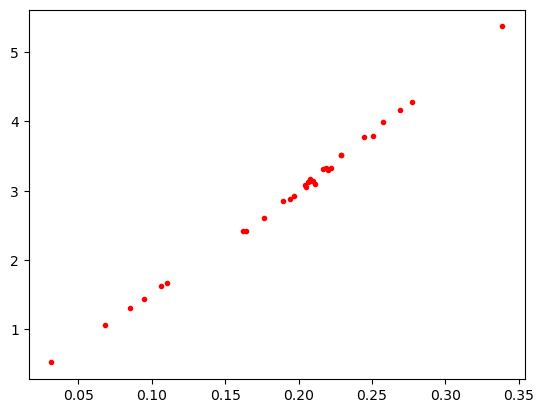

In [ ]:
plt.plot(df_combo['Density g/cm3'], Depth_DL, '.r')

(array([1., 0., 1., 2., 2., 0., 0., 2., 1., 3., 7., 4., 2., 2., 2., 1., 0.,
        0., 0., 1.]),
 array([0.51285481, 0.75562996, 0.99840511, 1.24118026, 1.48395541,
        1.72673056, 1.96950572, 2.21228087, 2.45505602, 2.69783117,
        2.94060632, 3.18338147, 3.42615662, 3.66893178, 3.91170693,
        4.15448208, 4.39725723, 4.64003238, 4.88280753, 5.12558268,
        5.36835784]),
 <BarContainer object of 20 artists>)

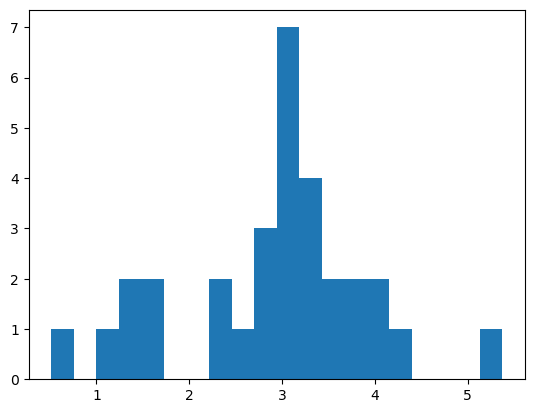

In [ ]:
plt.hist(MC_Av_rho_T_df_B['SingleFI_D_km'], bins=20)

In [ ]:
print('Median P')
print(np.median(Depth_RL))
print('25 Quantile')
print(np.quantile(Depth_RL, 0.16))
print('75 Quantile')
print(np.quantile(Depth_RL, 0.84))

Median P
3.309123314507732
25 Quantile
1.7398787178061652
75 Quantile
3.999040416499793


In [ ]:
max(Depth_RL)

5.721093015700244

In [ ]:
print('Median P')
print(np.median(P_DZ06['P_kbar_mixCO2_DZ06_Hloss']))
print('16 Quantile')
print(np.quantile(P_DZ06['P_kbar_mixCO2_DZ06_Hloss'], 0.16))
print('84 Quantile')
print(np.quantile(P_DZ06['P_kbar_mixCO2_DZ06_Hloss'], 0.84))

Median P
0.7583585870917166
16 Quantile
0.38678753819145006
84 Quantile
0.9287190708428936


(array([ 1.,  3.,  2.,  2.,  6., 11.,  3.,  2.,  0.,  1.]),
 array([0.1179792 , 0.24289875, 0.3678183 , 0.49273785, 0.6176574 ,
        0.74257694, 0.86749649, 0.99241604, 1.11733559, 1.24225513,
        1.36717468]),
 <BarContainer object of 10 artists>)

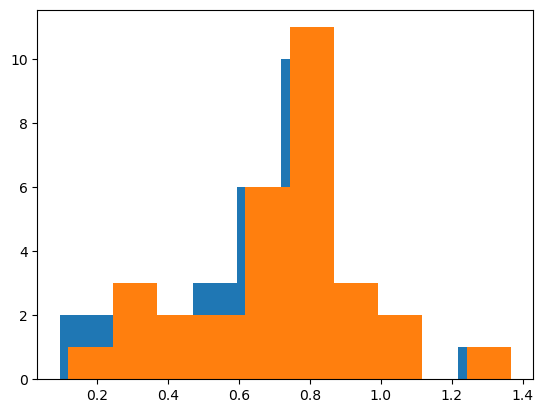

In [ ]:
plt.hist(P_DZ06['P_kbar_pureCO2_SW96'])
plt.hist(P_DZ06['P_kbar_mixCO2_DZ06_no_Hloss'])

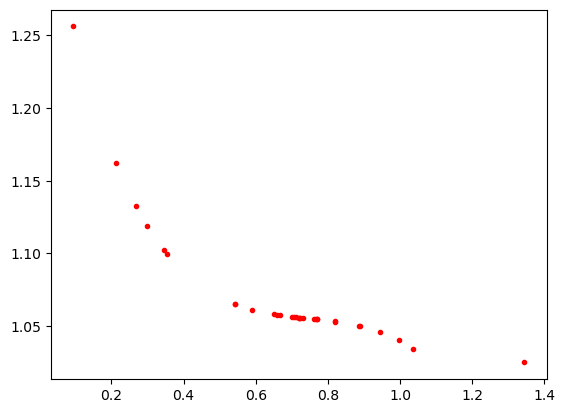

In [ ]:
plt.plot(P_DZ06['P_kbar_pureCO2_SW96'],  P_DZ06['P Mix_Hloss/P Pure DZ06'], '.r')

In [ ]:
0.5*np.abs(XH2O_max-XH2O_min)

array([0.03139561, 0.02805938, 0.02894046, 0.02868418, 0.02964105,
       0.02817475, 0.02944552, 0.05936877, 0.05042746, 0.06574182,
       0.07866803, 0.02586885, 0.02735616, 0.        , 0.02368957,
       0.02082461, 0.01786234, 0.11561941, 0.02577781, 0.05180682,
       0.02878375, 0.03330258, 0.02806323, 0.02886073, 0.02736898,
       0.02855738, 0.0286709 , 0.03331399, 0.02979726, 0.02868708,
       0.02810656])

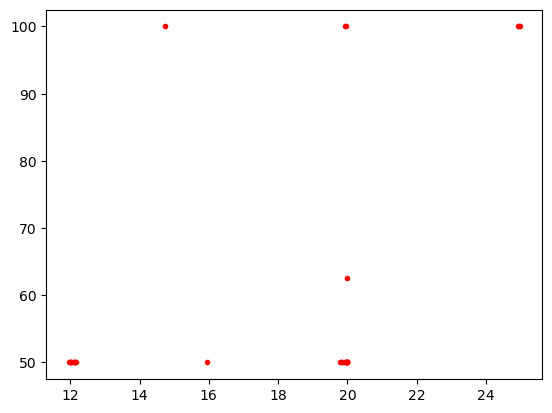

In [ ]:
plt.plot(df_combo['power (mW)'], df_combo['Mag (X)'], '.r')

## Showing H2O trends

In [ ]:
df_combo.to_clipboard(excel=True)

In [ ]:

ax1.plot(P_SW96['P_MPa'], XH2O, '.r')
ax2.plot(P_SW96['P_MPa'], SO2_frac, '.y')

ValueError: x and y must have same first dimension, but have shapes (31,) and (1,)

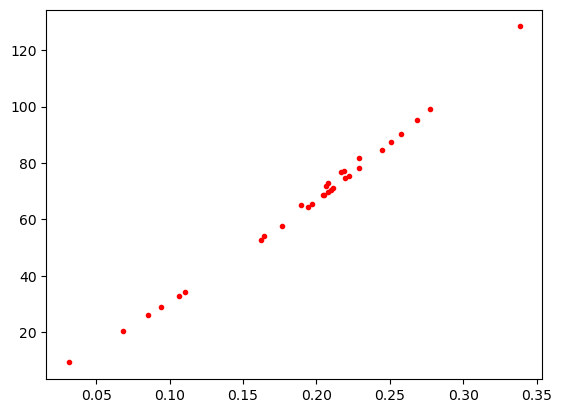

In [ ]:
#plt.plot(df_combo['Density g/cm3'], SO2_frac.fillna(0), '.r')
plt.plot(df_combo['Density g/cm3'], P_SW96['P_MPa'], '.r')


In [ ]:

df_FI_ML.head()



FI_1868=(df_FI_ML['filename'].str.contains('MLP'))
FI_1852=(df_FI_ML['filename'].str.contains('MP2'))

MC_Av_rho_T_ML, MC_All_rho_T_ML, fig=pf.propagate_FI_uncertainty(
T_K=df_FI_ML['Temp_from_Fo']+273.15,
error_T_K=np.std(df_FI_ML['Temp_from_Fo']), error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=df_FI_ML['Density g/cm3_x'],error_CO2_dens=df_FI_ML['σ Density g/cm3'], error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
sample_ID=df_FI_ML['filename'],
model='ryan_lerner', 
N_dup=1000, fig_i=0, plot_figure=False)



# Lets add the pressure back into the original df
df_FI_ML['D (km)']=MC_Av_rho_T_ML['SingleFI_P_kbar']
df_FI_ML['D (km)']=MC_Av_rho_T_ML['SingleFI_D_km']

SyntaxError: invalid syntax (1880845484.py, line 14)

## Berenise 2022 data

In [ ]:
df_B=pd.read_excel('Berenise_2022.xlsx')
df_B.head()

MC_Av_rho_T_df_B, MC_All_rho_T_df_B, fig=pf.propagate_FI_uncertainty(
T_K=1299.4908415519822+273.15,
error_T_K=50, error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=df_B['Density g/cm3'],error_CO2_dens=df_B['σ Density g/cm3'], 
error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
sample_ID=df_B['filename'],
model='ryan_lerner',
N_dup=1000, fig_i=0, plot_figure=False)
MC_Av_rho_T_df_B.head()


df_B['D (km)']=MC_Av_rho_T_df_B['SingleFI_P_kbar']
df_B['D (km)']=MC_Av_rho_T_df_B['SingleFI_D_km']



working on sample number 0
working on sample number 20


## For Kendra


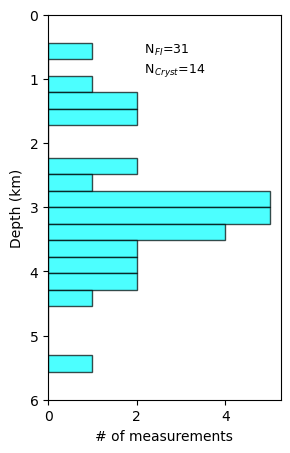

In [ ]:
from matplotlib import patches
fig, ((ax3b)) = plt.subplots(1, 1, figsize=(3,5))
M2022=pd.concat([df_FI_ML['D (km)'].loc[FI_2022], df_B['D (km)']])
ax3b.hist(M2022,alpha=0.7,
          orientation='horizontal',color='cyan', bins=20, ec='k')
ax3b.set_ylim([6, 0])
ax3b.set_ylabel('Depth (km)')
ax3b.set_xlabel('# of measurements')


ax3b.annotate(" N$_{FI}$=" + str(len(M2022)), 
              xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
# ax3b.annotate(" N$_{\, Fo}$=" + str(sum(df_FI['Fo'].loc[FI_2022]>0)), 
#               xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
ax3b.annotate(" N$_{Cryst}$=" + str(len(df_FI_ML['crystal'].loc[FI_2022].unique())+len(df_B['crystal'].unique()) ), 
              xy=(0.4, 0.85), xycoords="axes fraction", fontsize=9)

#ax3b.plot(5.5+np.random.normal(-0.01, 0.01, size=len(M2022)), M2022, 'xc', ms=3)

fig.savefig('Depths_for_kendra.pdf', dpi=300)


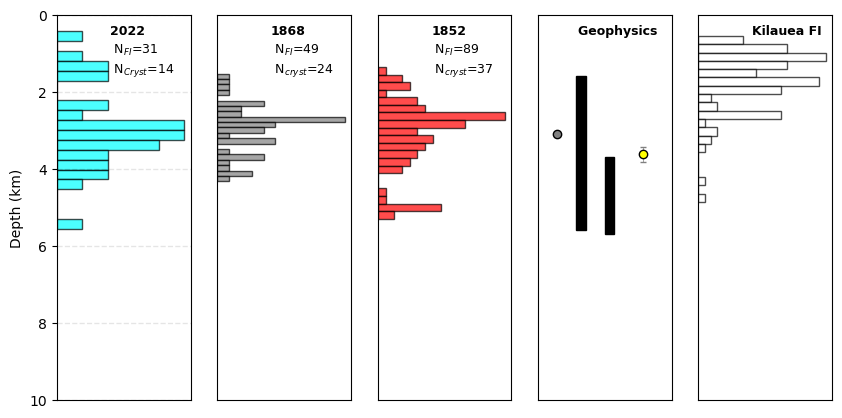

In [ ]:
from matplotlib import patches
fig, ((ax3b, ax3c, ax3d,  ax3e, ax3k)) = plt.subplots(1, 5, figsize=(10,5), sharey=True,gridspec_kw={'width_ratios': [0.7, 0.7, 0.7, 0.7, 0.7]})
plt.subplots_adjust(wspace=0.2, hspace=0)

ax3b.axes.get_xaxis().set_visible(False)
#ax3b.axes.get_yaxis().set_visible(False)
ax3c.axes.get_xaxis().set_visible(False)
ax3c.axes.get_yaxis().set_visible(False)
ax3d.axes.get_xaxis().set_visible(False)
ax3d.axes.get_yaxis().set_visible(False)

# 2022 combined
M2022=pd.concat([df_FI_ML['D (km)'].loc[FI_2022], df_B['D (km)']])
ax3b.hist(M2022,alpha=0.7,density=1,
          orientation='horizontal',color='cyan', bins=20, ec='k')


# 1868
ax3c.hist(df_FI_ML['D (km)'].loc[FI_1868],alpha=0.7,density=1,
          orientation='horizontal',color='grey', ec='k', bins=20)

# 1852
ax3d.hist(df_FI_ML['D (km)'].loc[FI_1852],alpha=0.7,density=1,
          orientation='horizontal',color='red', ec='k', bins=20)

ax3b.annotate("2022", 
              xy=(0.4, 0.95), xycoords="axes fraction", fontsize=9,fontweight='bold')
ax3b.annotate(" N$_{FI}$=" + str(len(M2022)), 
              xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
# ax3b.annotate(" N$_{\, Fo}$=" + str(sum(df_FI['Fo'].loc[FI_2022]>0)), 
#               xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
ax3b.annotate(" N$_{Cryst}$=" + str(len(df_FI_ML['crystal'].loc[FI_2022].unique())+len(df_B['crystal'].unique()) ), 
              xy=(0.4, 0.85), xycoords="axes fraction", fontsize=9)


ax3c.annotate("1868", 
              xy=(0.4, 0.95), xycoords="axes fraction", fontsize=9,fontweight='bold')
ax3c.annotate(" N$_{FI}$=" + str(sum(df_FI_ML['D (km)'].loc[FI_1868]>0)), 
              xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
# ax3c.annotate(" N$_{\, Fo}$=" + str(sum(df_FI['Fo'].loc[FI_1868]>0)), 
#               xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
ax3c.annotate(" N$_{cryst}$=" + str(len(df_FI_ML['crystal'].loc[FI_1868].unique())), 
              xy=(0.4, 0.85), xycoords="axes fraction", fontsize=9)

ax3d.annotate("1852", 
              xy=(0.4, 0.95), xycoords="axes fraction", fontsize=9,fontweight='bold')
ax3d.annotate(" N$_{FI}$=" + str(sum(df_FI_ML['D (km)'].loc[FI_1852]>0)), 
              xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
# ax3d.annotate(" N$_{\, Fo}$=" + str(sum(df_FI['Fo'].loc[FI_1852]>0)), 
#               xy=(0.4, 0.9), xycoords="axes fraction", fontsize=9)
ax3d.annotate(" N$_{cryst}$=" + str(len(df_FI_ML['crystal'].loc[FI_1852].unique())), 
              xy=(0.4, 0.85), xycoords="axes fraction", fontsize=9)

ax3e.annotate("Geophysics ", 
              xy=(0.3, 0.95), xycoords="axes fraction", fontsize=9, fontweight='bold')

# Decker et al. 1983 - Mogi source 3.1
ax3e.errorbar(0.1, 3.1,
xerr=0, yerr=0.0,
fmt='o', ecolor='grey', elinewidth=0.5, mfc='grey', ms=6, mec='k', capsize=2, label='2022')


# Yun et al. (2005 )- 3.6 km radius of 2km - From inteferograms Jan 2002-May 2004
rect_Y2005 = patches.Rectangle((0.2, 3.6-2),0.05,4,linewidth=1,edgecolor='k',facecolor='black', label='Yun et al. 2005')
ax3e.add_patch(rect_Y2005)
# Amelung et al. 2006 - 4.7+-1 - inflation
rect_Y2005 = patches.Rectangle((0.35, 4.7-1),0.05,2,linewidth=1,edgecolor='k',facecolor='black', label='Amelung et al. 2007')
ax3e.add_patch(rect_Y2005)
# Johnson  - gravity
ax3e.errorbar(0.55, 3.63,
xerr=0, yerr=0.2,
fmt='o', ecolor='grey', elinewidth=0.5, mfc='yellow', ms=6, mec='k', capsize=2, label='2022')


ax3k.annotate("Kilauea FI", 
              xy=(0.4, 0.95), xycoords="axes fraction", fontsize=9, fontweight='bold')


ax3k.hist(df_FI_Kil['D (km)'],alpha=0.7,density=1,
          orientation='horizontal',color='white', bins=20, ec='k')

#ax3b.axes.get_xaxis().set_visible(False)
#ax3b.axes.get_yaxis().set_visible(False)
ax3c.axes.get_xaxis().set_visible(False)
ax3c.axes.get_yaxis().set_visible(False)
ax3d.axes.get_xaxis().set_visible(False)
ax3d.axes.get_yaxis().set_visible(False)
ax3e.axes.get_xaxis().set_visible(False)
ax3e.axes.get_yaxis().set_visible(False)
ax3k.axes.get_yaxis().set_visible(False)
ax3k.axes.get_xaxis().set_visible(False)
#ax3b.set_ylim([6,14])
#ax3b.axis("off")
#ax2.set_ylim([6, 0])
#ax2.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
ax3b.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
ax3c.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
ax3d.grid(color = 'k', linestyle = '--', linewidth = 1, alpha = 0.1)
ax3e.set_xlim([0, 0.7])
ax3b.set_ylim([10, 0])
#ax3a.set_ylim([0, ])
ax3b.set_ylabel('Depth (km)')
ax3b.set_xlabel('Host olivine Forsterite')

#ax2.legend()
fig.savefig('MaunaLoa_Depth.png', dpi=200)